## EDA and Machine Learning in Iris Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species with 50 samples each as well as some properties about each flower.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

d=pd.read_csv(r"Iris.csv")

In [3]:
# To display first five rows

d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To display last five rows

d.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# To display number of rows and columns

d.shape

(150, 6)

In [6]:
# To display the columns

d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# To display the datatypes

d.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Categogical values are present in the Species column.

In [9]:
# To display unique values in Species column

d['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# It can be converted to numerical values using label encoding.

le=LabelEncoder()
d['Species']=le.fit_transform(d['Species'])

In [11]:
# To display unique values in Species column

d['Species'].unique()

array([0, 1, 2])

In [12]:
# To display basic information

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [13]:
# To display statistical insights of data

d.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Check for null values

d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# Also check for duplicated rows in the data.

d.duplicated().sum()

0

In [16]:
col=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']

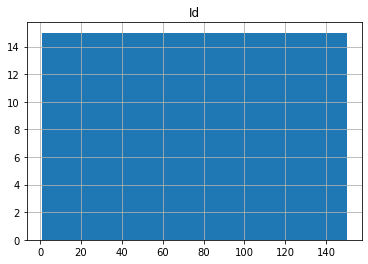

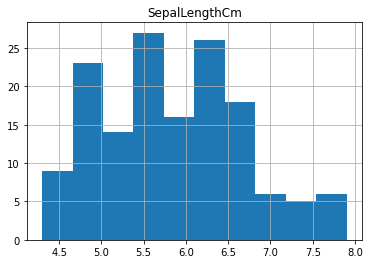

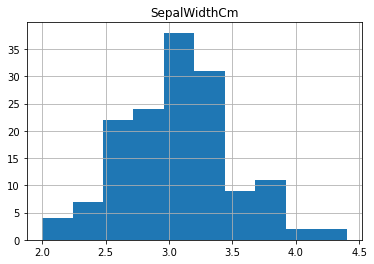

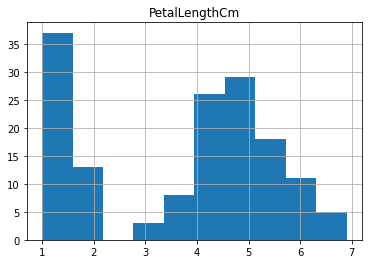

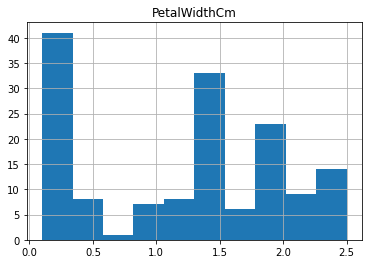

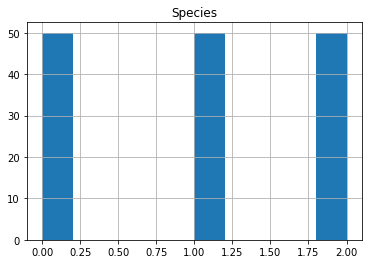

In [17]:
# Plotting histogram

for i in col:
    d.hist(i)

Id


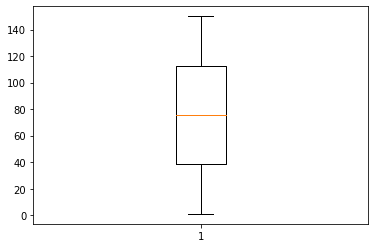

SepalLengthCm


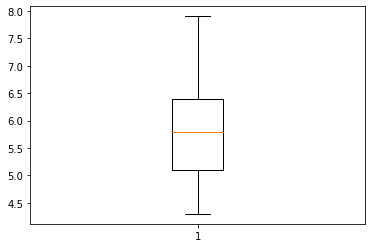

SepalWidthCm


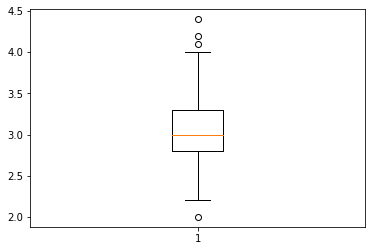

PetalLengthCm


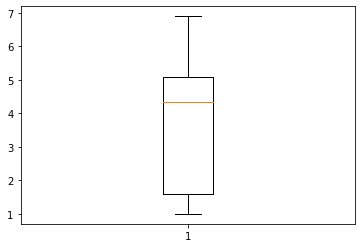

PetalWidthCm


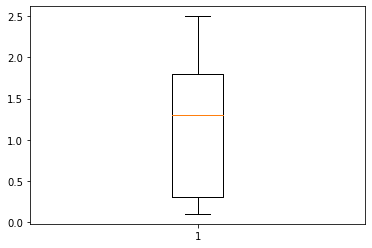

Species


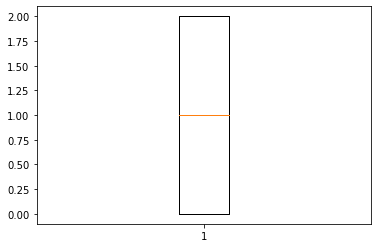

In [18]:
# Finding outliers using boxplot

for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [19]:
# There is no outliers or no significant amount of outliers in the columns.

In [20]:
# Check for skew

d.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
dtype: float64

In [21]:
# Categorical columns should not be scaled.
# Normal columns also need not be scaled.
# So, scaling is not an abosulte necessity here.

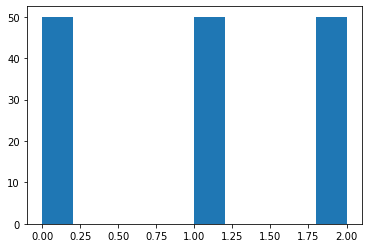

In [22]:
# The distribution of species

plt.hist(d['Species'])
plt.show()

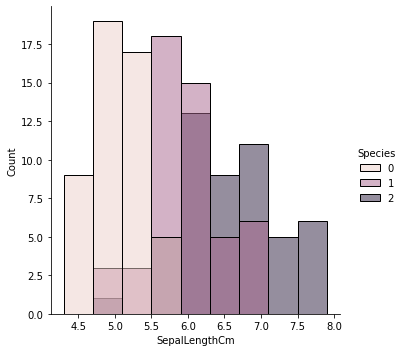

In [23]:
# The distribytion of sepal length to species

sns.displot(x=d['SepalLengthCm'], hue=d['Species'],kind='hist')
plt.show()

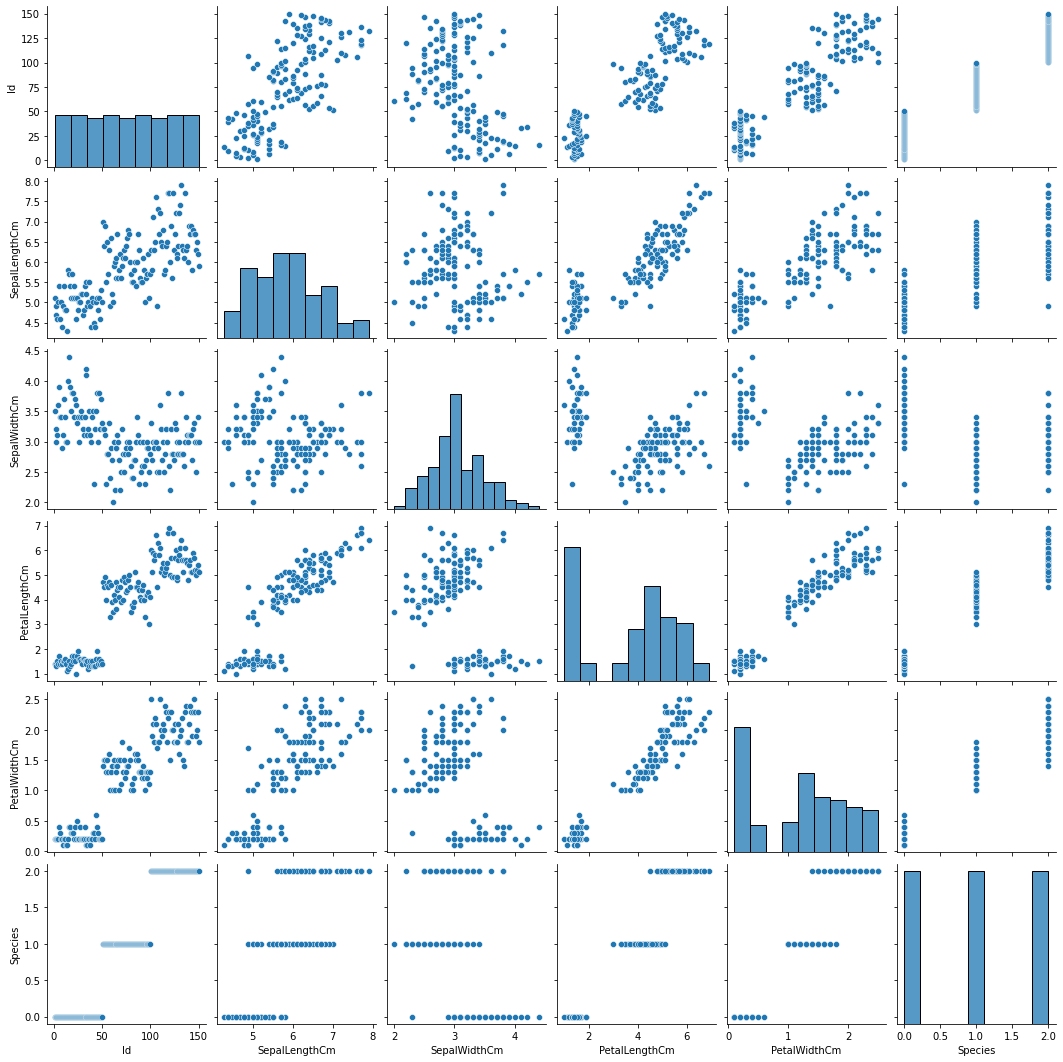

In [24]:
# Creating pairplot

sns.pairplot(d)
plt.show()

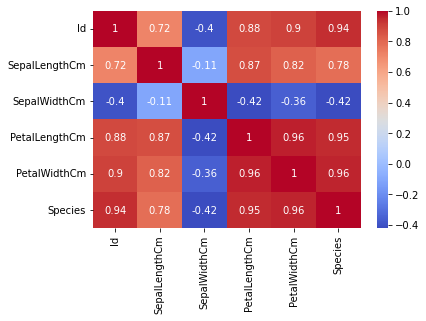

In [25]:
# Creating correlation heatmap

sns.heatmap(d.corr(),annot=True,cmap='coolwarm')
plt.show()

In [26]:
# All of the columns are tightly correlated to each other.

In [28]:
# Machine learning

# Splitting the data into x and y. ie, independant variables and target column.

y=d["Species"]
x=d.drop(["Species"],axis=1)

In [29]:
# Traing the model with RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=7)

rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc_train=rfc.predict(x_train)
rfc_test=rfc.predict(x_test)

print('Accuracy score of train :',accuracy_score(y_train,rfc_train))
print('Accuracy score of test :',accuracy_score(y_test, rfc_test))
print('Classification Report :\n',classification_report(y_test, rfc_test))
print('Confusion_matrix :\n',confusion_matrix(y_test, rfc_test))

Accuracy score of train : 1.0
Accuracy score of test : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion_matrix :
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 20]]


The accuracy scores of train and test are also 1, which means that the model is able to correctly predict the labels of the data with 100% accuracy. The confusion matrix shows that the model correctly predicted all of the labels in the test set. The classification report shows that the model has a precision, recall, and f1-score of 1 for all three classes. This means that the model is perfectly accurate at predicting the labels of all three classes.

In conclusion, the model is perfectly accurate and is able to correctly predict the labels of the data with 100% accuracy.

In [30]:
# Traing the model with DecisionTreeClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=7)

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
dtc_train=dtc.predict(x_train)
dtc_test=dtc.predict(x_test)

print('Accuracy score of train :',accuracy_score(y_train,dtc_train))
print('Accuracy score of test :',accuracy_score(y_test, dtc_test))
print('Classification Report :\n',classification_report(y_test, dtc_test))
print('Confusion_matrix :\n',confusion_matrix(y_test, dtc_test))

Accuracy score of train : 1.0
Accuracy score of test : 0.9666666666666667
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        21
           2       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion_matrix :
 [[19  0  0]
 [ 0 21  0]
 [ 0  2 18]]


The confusion matrix shows that the model correctly predicted 97% of the labels in the test set. The classification report shows that the model has a f1-score of 1 for class 0, 0.95 for class 1, and 0.95 for class 2. These scores are all relatively high, indicating that the model is accurate at predicting the labels of all three classes.

In [31]:
# Traing the model with KNeighborsClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=7)

knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train,y_train)
knn_train=knn.predict(x_train)
knn_test=knn.predict(x_test)

print('Accuracy score of train :',accuracy_score(y_train,knn_train))
print('Accuracy score of test :',accuracy_score(y_test, knn_test))
print('Classification Report :\n',classification_report(y_test, knn_test))
print('Confusion_matrix :\n',confusion_matrix(y_test, knn_test))

Accuracy score of train : 1.0
Accuracy score of test : 0.9666666666666667
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        21
           2       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion_matrix :
 [[19  0  0]
 [ 0 21  0]
 [ 0  2 18]]


The confusion matrix shows that the model correctly predicted 97% of the labels in the test set. The classification report shows that the model has a f1-score of 1 for class 0, 0.95 for class 1, and 0.95 for class 2. These scores are all relatively high, indicating that the model is accurate at predicting the labels of all three classes.